# Exercise sheet 4, Task 4

## Import the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Visualize the logistic map bifurcation

In [2]:
def plot_logistic_map_bifurcation(r_min, r_max):
    """ Plot the logistic map bifurcation diagram between the r range r_min, r_max.

    Args:
        r_min (int): Lowerbound for the parameter r.
        r_max (int): Upperbound for the parameter r.
    """
    # Set the number of iterations to use for each value of r
    iterations = 100

    # Set the initial value of x
    x = random.random()

    # Create an empty list to store the results
    results = []
    
    # Iterate over a range of r values
    for r in range(r_min*10000, r_max*10000+1):
        # Reset the value of x for each new value of r
        x = random.random()
        # Iterate for the specified number of iterations
        for i in range(iterations):
            # Update the value of x using the given equation
            x = r/10000 * x * (1 - x)
            # Append the current value of x to the results list
        results.append((r/10000, x))
    
    # Convert the results list to a NumPy array for easier plotting
    results = np.array(results)

    # Extract the r and x values from the results array
    r_values = results[:,0]
    x_values = results[:,1]

    # Plot the bifurcation diagram
    plt.scatter(r_values, x_values, s=1)
    plt.xlabel('r')
    plt.ylabel('x')
    plt.title("Logistic map bifurcation")
    plt.show()

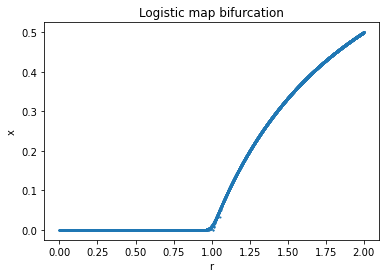

In [3]:
# Logistic map bifurcation when r varies from 0 to 2
plot_logistic_map_bifurcation(r_min=0,r_max=2)

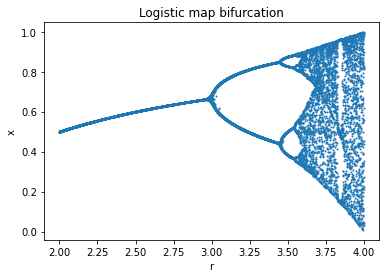

In [4]:
plot_logistic_map_bifurcation(r_min=2,r_max=4)

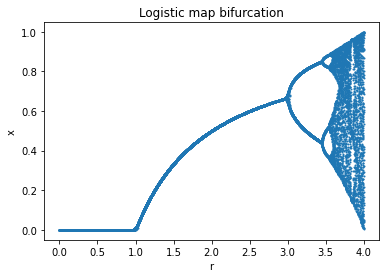

In [5]:
plot_logistic_map_bifurcation(r_min=0,r_max=4)

## Lorenz system

In [6]:
#Eucledian distance for 3d
def eucledian_distance(x1, y1, z1, x2, y2, z2):
    """Compute the Euclidean distance for 3-dimensional points. 

    Args:
        x1 (float): x value of the first point.
        y1 (float): y value of the first point.
        z1 (float): z value of the first point.
        x2 (float): x value of the second point.
        y2 (float): y value of the second point.
        z2 (float): z value of the second point.

    Returns:
        float: Distance
    """
    return np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)

In [7]:
def lorenz_trajectories_and_differences(rho):
    """ Visualize single trajectories for the given rho value,
    first plot represents the trajectory starting at (10,10,10),
    second plot represents the trajectory starting at (10+10^-8,10,10),
    third plot represents differences between two trajectories over time.

    Args:
        rho (float): Rho value for the Lorenz system.
    """
    # Set the Lorenz parameters
    sigma = 10
    beta = 8/3
    
    # Define the function that describes the Lorenz 
    def lorenz(t, y):
        x, y, z = y
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z
        return dx, dy, dz
    
    # Set the time range to solve for
    t_min = 0
    t_max = 1000
    
    # Set the initial values of the system
    x0, y0, z0 = 10, 10, 10
    
    # Solve for the trajectory of the system
    trajectory = solve_ivp(lorenz, (t_min, t_max), (x0, y0, z0))

    # Extract the solution arrays from the result
    x = trajectory.y[0]
    y = trajectory.y[1]
    z = trajectory.y[2]
    t = trajectory.t

    # Create a figure and an axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trajectory
    ax.plot(x, y, z, linewidth=0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title("Lorenz trajectory starting at ("+str(x0)+", " +str(y0)+","+str(z0)+")")
    plt.show()
    
    # Second trajectory
    
    # Only change x0 by adding 10^-8, y and z remains same
    x0_changed = 10+10**-8
    trajectory = solve_ivp(lorenz, (t_min, t_max), (x0_changed, y0, z0))
    
    x_changed = trajectory.y[0]
    y_changed = trajectory.y[1]
    z_changed = trajectory.y[2]
    
    # Create a figure and an axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trajectory
    ax.plot(x_changed, y_changed, z_changed, linewidth=0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title("Lorenz trajectory starting at (10+10^-8"+", " +str(y0)+","+str(z0)+")")
    plt.show()
    
    found = False
    differences = []
    for i,time_step in enumerate(t):
        if(not found and eucledian_distance(x[i], y[i], z[i], x_changed[i], y_changed[i], z_changed[i]) > 1):
            found = True
            print("For Rho:",rho,"difference exceed 1 at", time_step)
        differences.append(eucledian_distance(x[i], y[i], z[i], x_changed[i], y_changed[i], z_changed[i]))

    plt.plot(t, differences)
    plt.xlabel("Time")
    plt.ylabel("Difference between trajectories")
    plt.title("Differences between two trajectories over time")
    plt.show()

## Visualize a single trajectory of the Lorenz system for rho = 28 starting at (10,10,10) and starting at (10+10^-8, 10, 10), and plot the differences

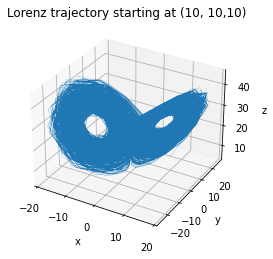

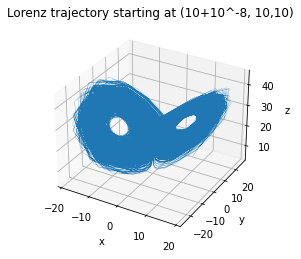

For Rho: 28 difference exceed 1 at 24.847137244722187


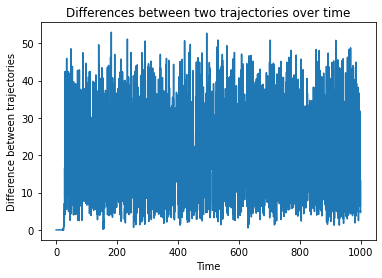

In [8]:
lorenz_trajectories_and_differences(rho=28)

## Visualize a single trajectory of the Lorenz system for rho = 28 starting at (10,10,10) and starting at (10+10^-8, 10, 10), and plot the differences

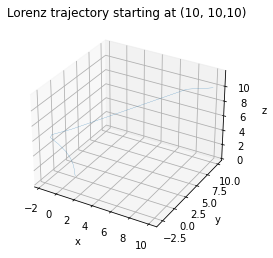

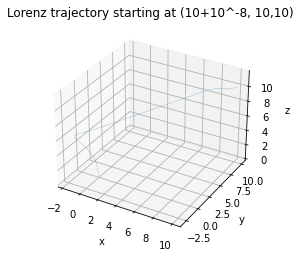

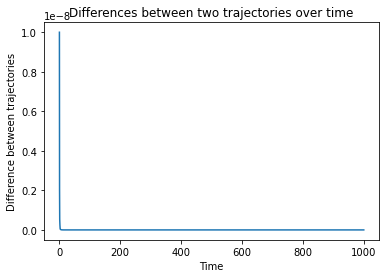

In [9]:
lorenz_trajectories_and_differences(rho=0.5)